In [3]:
import Environments_StochasticBandits as env
import Algorithms_Baselines as alg
import Algorithms_MyStrategy as myalg
import Experiments_MakeBanditExperiments as xps
import time
import numpy as np
import matplotlib.pyplot as plt
from math import log

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
nbArms=3
timeHorizon=1000

In [21]:
def runTestPartB(bandit, dist, variance=1):
    nbArms = bandit.A
    
    learner = alg.UCB(nbArms)
    ucb_regrets = xps.OneBanditOneLearnerMultipleRun(bandit, learner, timeHorizon, num_runs=100)
    xps.visualize_regrets(ucb_regrets, "UCB")

    learner = alg.KLUCB(nbArms, dist=dist, variance=variance)
    kl_ucb_regrets = xps.OneBanditOneLearnerMultipleRun(bandit, learner, timeHorizon, num_runs=100)
    xps.visualize_regrets(kl_ucb_regrets, "KL UCB")

    learner = alg.TS(nbArms)
    ts_regrets = xps.OneBanditOneLearnerMultipleRun(bandit, learner, timeHorizon, num_runs=100)
    xps.visualize_regrets(ts_regrets, "Thompson sampling")

    T = np.arange(timeHorizon) + 1
    avg_ucb_Rg = np.mean(ucb_regrets, axis=0)
    avg_kl_ucb_Rg = np.mean(kl_ucb_regrets, axis=0)
    avg_TS = np.mean(ts_regrets, axis=0)

    plt.figure(figsize=(10,10))
    plt.plot(T, avg_ucb_Rg, label='UCB')
    plt.plot(T, avg_kl_ucb_Rg, label='KL-UCB')
    plt.plot(T, avg_TS, label='TS')
    plt.legend(fontsize=24)
    plt.show()

In [18]:
def runTest(bandit, dist, variance=1):
    nbArms = bandit.A

    learner = alg.FTL(nbArms)
    ftl_regrets = xps.OneBanditOneLearnerMultipleRun(bandit, learner, timeHorizon, num_runs=100)
    xps.visualize_regrets(ftl_regrets, "FTL")

    learner = alg.UCB(nbArms)
    ucb_regrets = xps.OneBanditOneLearnerMultipleRun(bandit, learner, timeHorizon, num_runs=100)
    xps.visualize_regrets(ucb_regrets, "UCB")

    learner = alg.UCBLaplace(nbArms)
    ucb_laplace_regrets = xps.OneBanditOneLearnerMultipleRun(bandit, learner, timeHorizon, num_runs=100)
    xps.visualize_regrets(ucb_laplace_regrets, "UCB Laplace")
    
    learner = alg.UCBPeeling(nbArms)
    ucb_peeling_regrets = xps.OneBanditOneLearnerMultipleRun(bandit, learner, timeHorizon, num_runs=100)
    xps.visualize_regrets(ucb_peeling_regrets, "UCB Peeling")

    learner = alg.KLUCB(nbArms, dist=dist, variance=variance)
    kl_ucb_regrets = xps.OneBanditOneLearnerMultipleRun(bandit, learner, timeHorizon, num_runs=100)
    xps.visualize_regrets(kl_ucb_regrets, "KL UCB")

    learner = alg.TS(nbArms)
    ts_regrets = xps.OneBanditOneLearnerMultipleRun(bandit, learner, timeHorizon, num_runs=100)
    xps.visualize_regrets(ts_regrets, "Thompson sampling")

    learner = alg.Besa(nbArms)
    besa_regrets = xps.OneBanditOneLearnerMultipleRun(bandit, learner, timeHorizon, num_runs=100)
    xps.visualize_regrets(besa_regrets, 'BESA')


    T = np.arange(timeHorizon) + 1
    avg_ftl_Rg = np.mean(ftl_regrets, axis=0)
    avg_ucb_Rg = np.mean(ucb_regrets, axis=0)
    avg_kl_ucb_Rg = np.mean(kl_ucb_regrets, axis=0)
    avg_ucb_laplace_Rg = np.mean(ucb_laplace_regrets, axis=0)
    avg_ucb_peeling_regrets = np.mean(ucb_peeling_regrets, axis=0)
    avg_TS = np.mean(ts_regrets, axis=0)
    avg_Besa = np.mean(besa_regrets, axis=0)

    plt.figure(figsize=(10,10))
    plt.plot(T, avg_ftl_Rg, label='FTL')
    plt.plot(T, avg_ucb_Rg, label='UCB')
    plt.plot(T, avg_ucb_laplace_Rg, label='UCB Laplace')
    plt.plot(T, avg_ucb_peeling_regrets, label='UCB Peeling')
    plt.plot(T, avg_kl_ucb_Rg, label='KL-UCB')
    plt.plot(T, avg_TS, label='TS')
    plt.plot(T, avg_Besa, label='Besa')
    plt.plot(T, np.log(T)*alg.lowerBound(bandit.armMeans, dist=dist, var=variance), label='lower bound')
    plt.legend(fontsize=24)
    plt.show()

# Easy and Hard Bernoulli problems

In [23]:
# hard problem
bandit = env.StochasticBandit(nbArms)
bandit.createBernoulliArmsFromMeans([0.32, 0.32, 0.36])

100%|██████████| 100/100 [00:10<00:00,  9.19it/s]


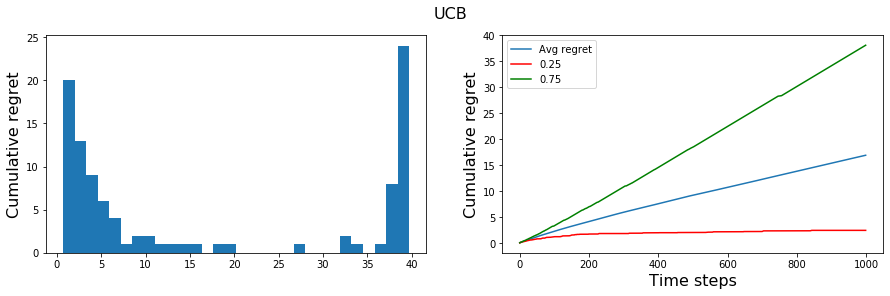

100%|██████████| 100/100 [00:23<00:00,  4.29it/s]


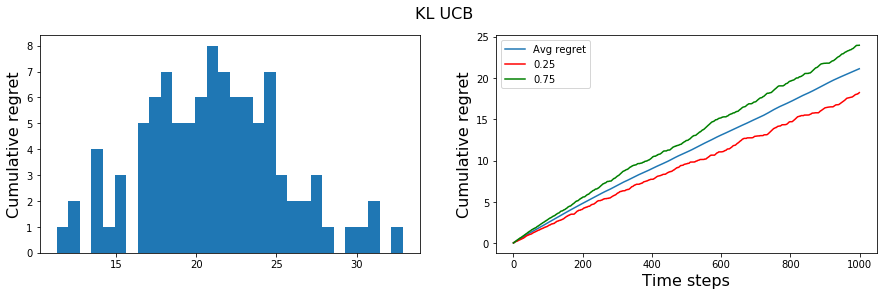

100%|██████████| 100/100 [00:22<00:00,  4.50it/s]


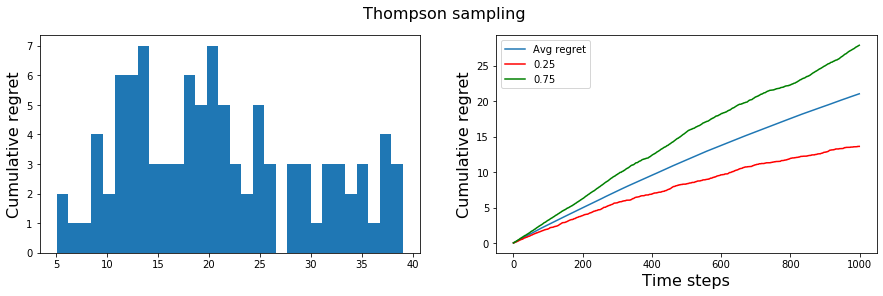

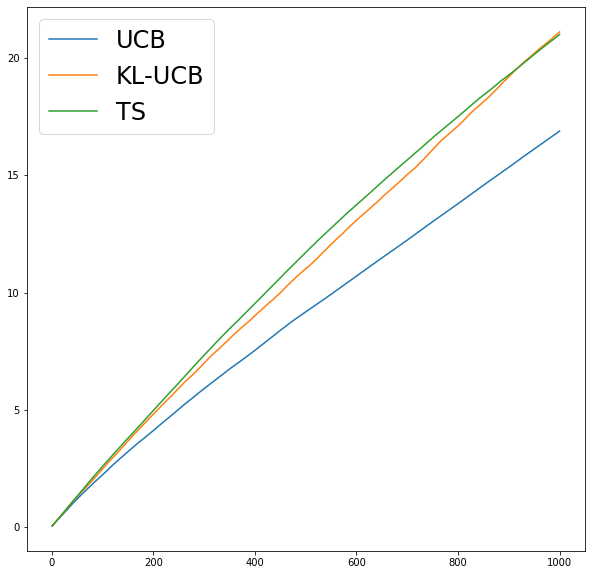

In [25]:
runTestPartB(bandit, dist=alg.BERNOULLI)

100%|██████████| 100/100 [00:10<00:00,  9.12it/s]


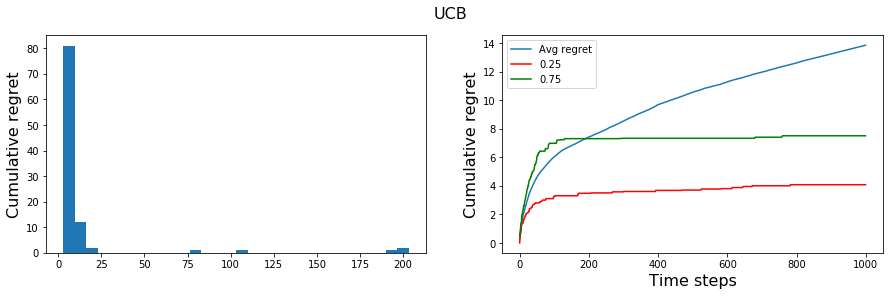

100%|██████████| 100/100 [00:25<00:00,  3.97it/s]


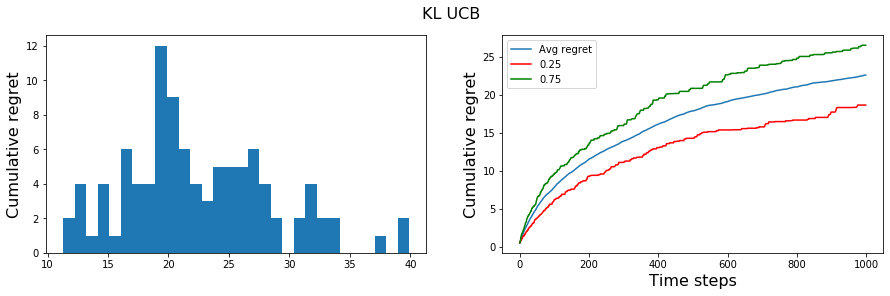

100%|██████████| 100/100 [00:22<00:00,  4.44it/s]


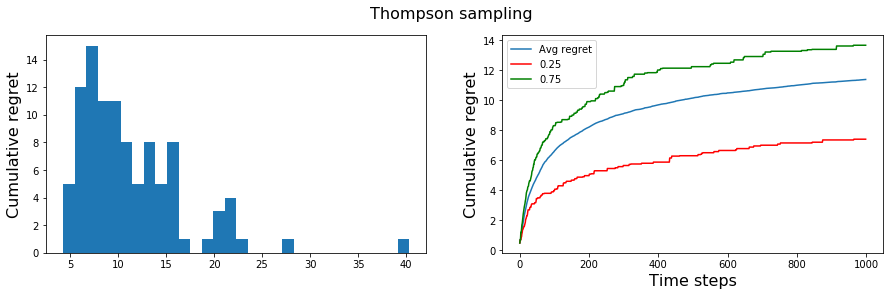

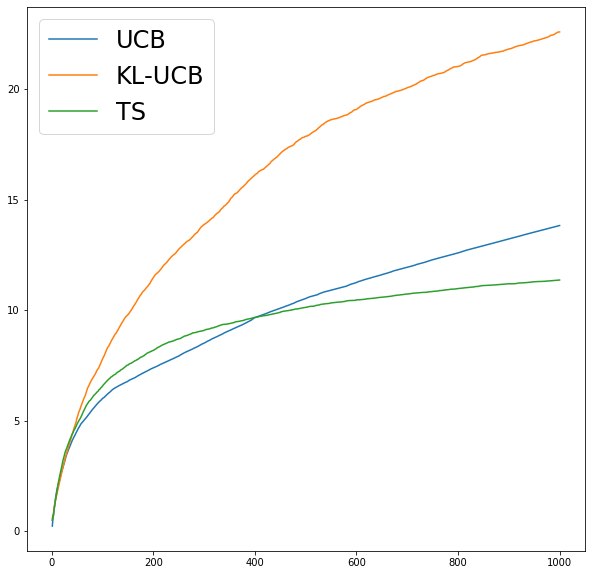

In [26]:
# easy problem
bandit = env.StochasticBandit(nbArms)
bandit.createBernoulliArmsFromMeans([0.2, 0.5, 0.7])
runTestPartB(bandit, dist=alg.BERNOULLI)

100%|██████████| 100/100 [00:09<00:00, 10.45it/s]


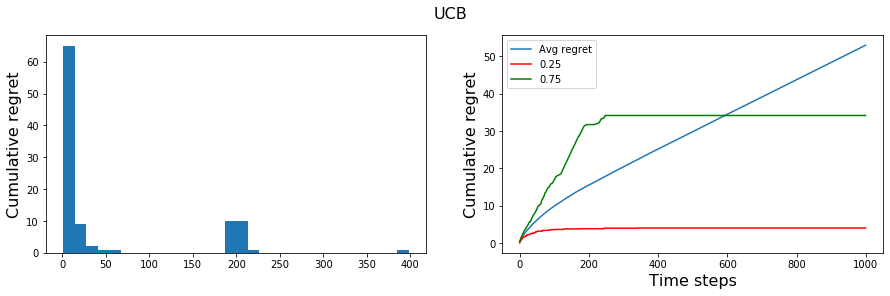

100%|██████████| 100/100 [00:07<00:00, 13.08it/s]


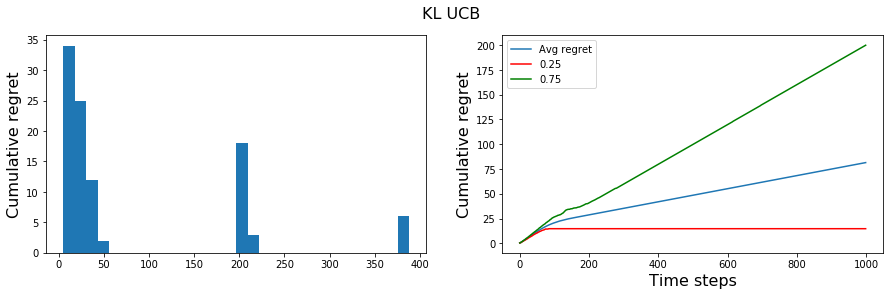

100%|██████████| 100/100 [00:20<00:00,  4.82it/s]


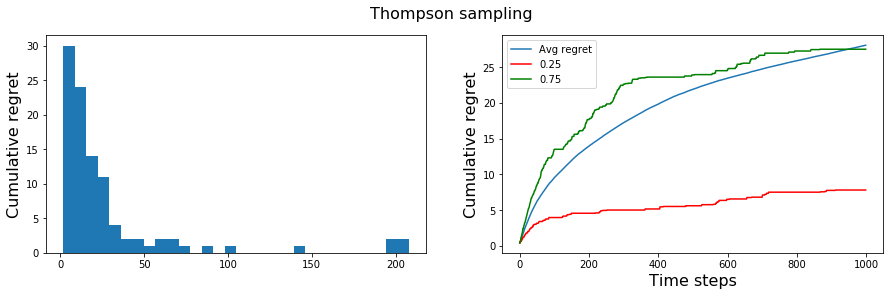

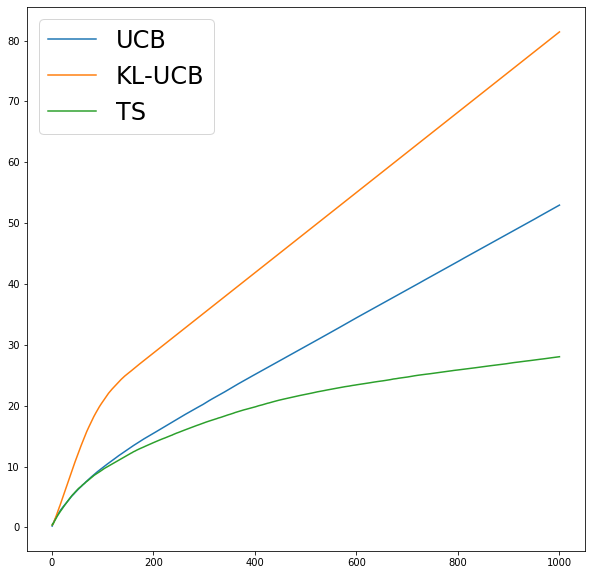

In [41]:
# Gaussian bandit with small variance
bandit = env.StochasticBandit(nbArms)
bandit.createGaussianArmsFromMeansAndVariance([0.2, 0.4, 0.6], 1)
runTestPartB(bandit, dist=alg.GAUSSIAN, variance=1)

100%|██████████| 100/100 [00:09<00:00, 10.27it/s]


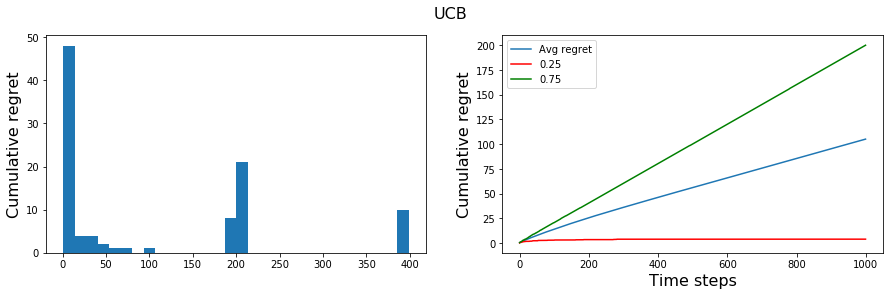

100%|██████████| 100/100 [00:07<00:00, 13.06it/s]


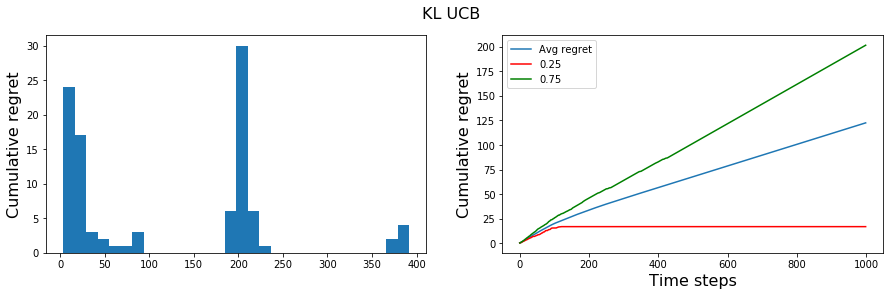

100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


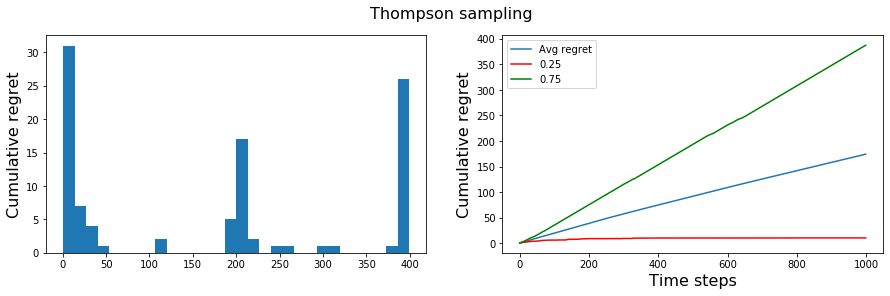

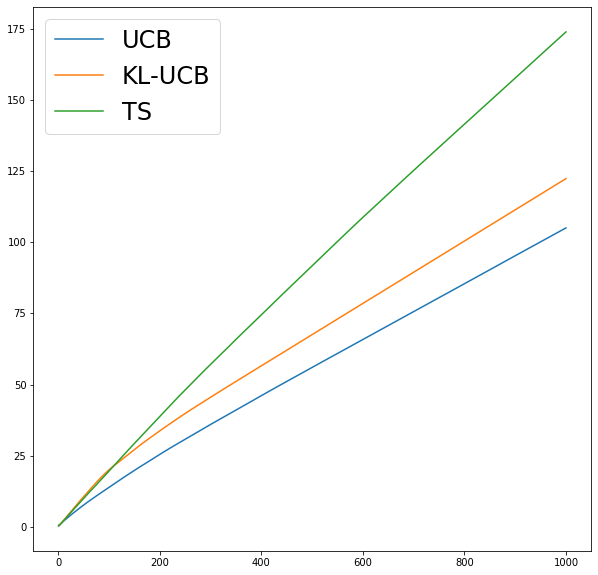

In [42]:
# Gaussian bandit with big variance
bandit = env.StochasticBandit(nbArms)
bandit.createGaussianArmsFromMeansAndVariance([0.2, 0.4, 0.6], 2)
runTestPartB(bandit, dist=alg.GAUSSIAN, variance=4)

# Bernoulli

100%|██████████| 100/100 [00:05<00:00, 19.41it/s]


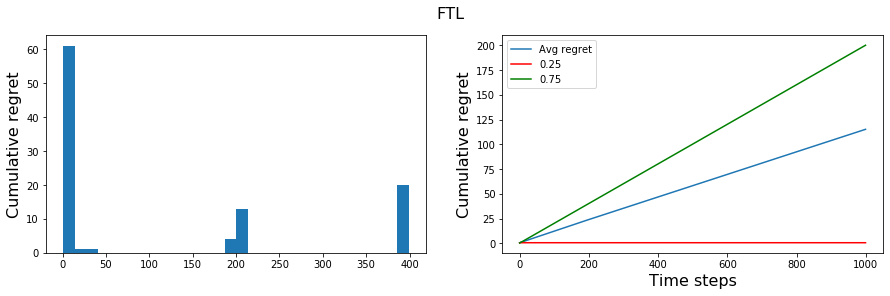

100%|██████████| 100/100 [00:11<00:00,  8.94it/s]


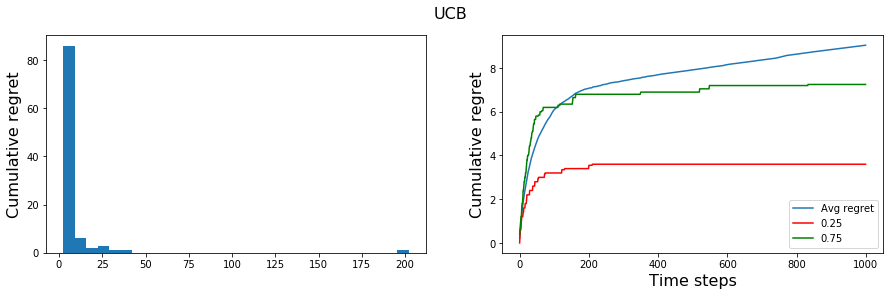

100%|██████████| 100/100 [00:11<00:00,  8.49it/s]


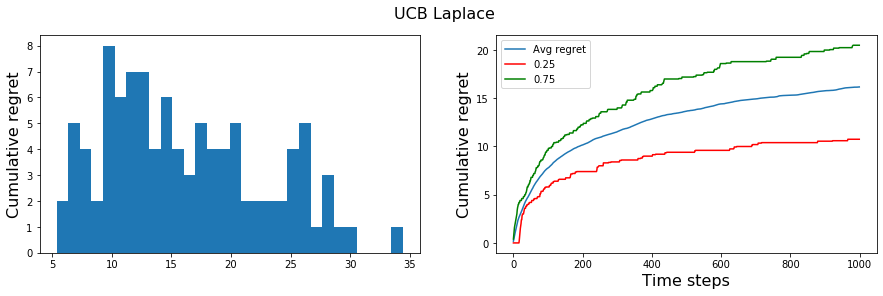

100%|██████████| 100/100 [00:12<00:00,  7.98it/s]


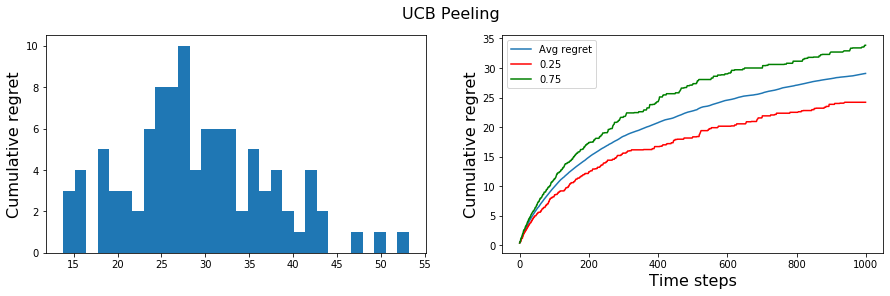

100%|██████████| 100/100 [00:24<00:00,  4.14it/s]


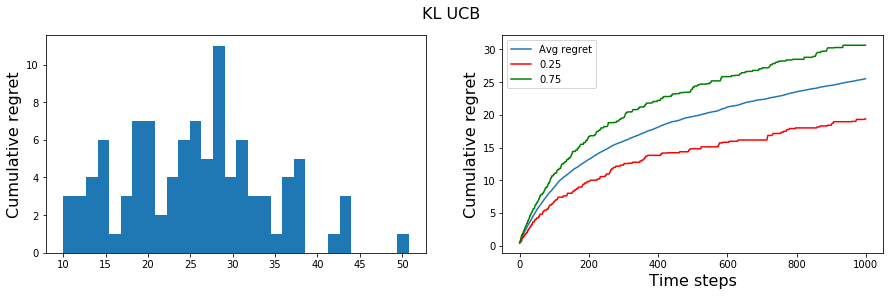

100%|██████████| 100/100 [00:22<00:00,  4.42it/s]


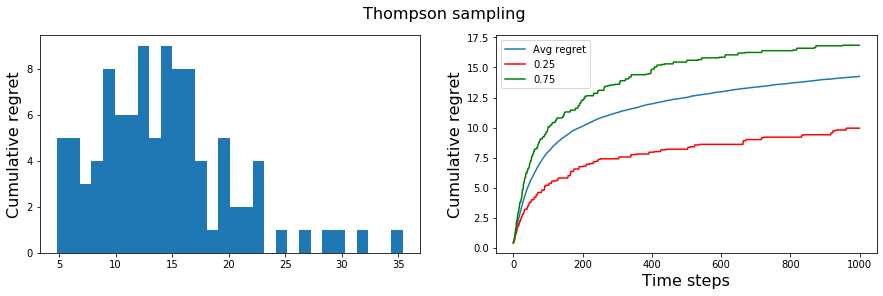

100%|██████████| 100/100 [00:28<00:00,  3.51it/s]


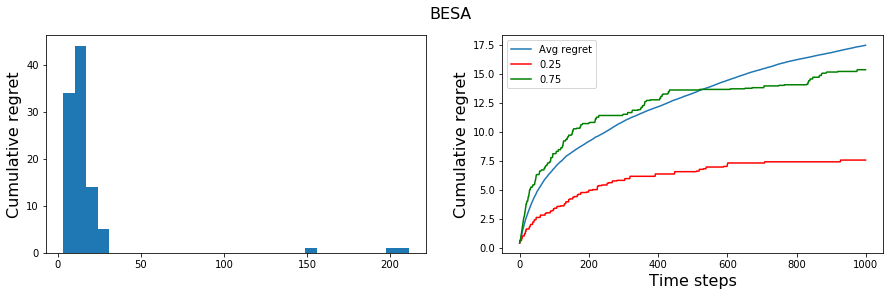

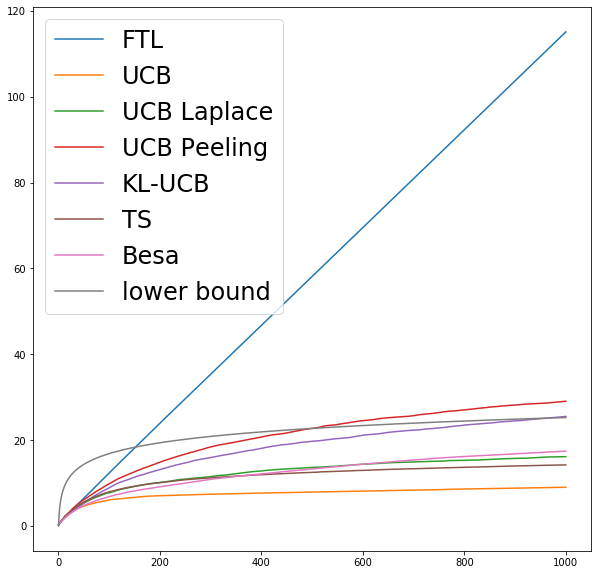

In [22]:
bandit = env.StochasticBandit(nbArms)
bandit.createBernoulliArmsFromMeans([0.2,0.4,0.6])
runTest(bandit, alg.BERNOULLI)

# Exponential

100%|██████████| 100/100 [00:04<00:00, 23.97it/s]


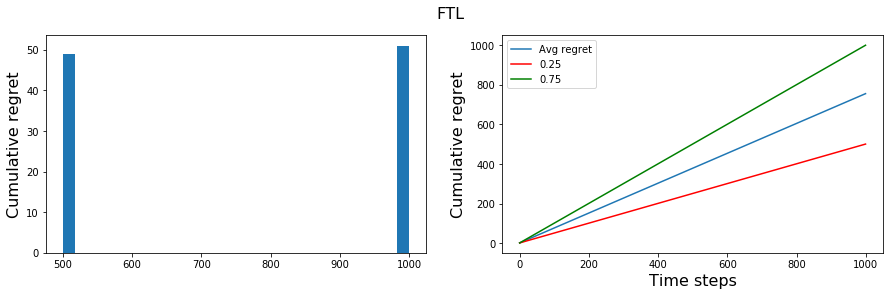

100%|██████████| 100/100 [00:11<00:00,  8.73it/s]


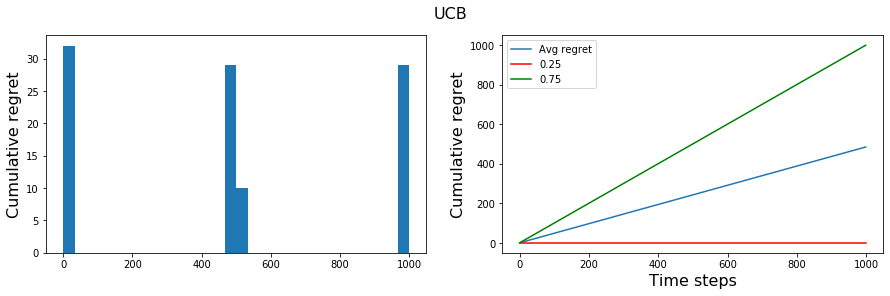

100%|██████████| 100/100 [00:10<00:00,  9.45it/s]


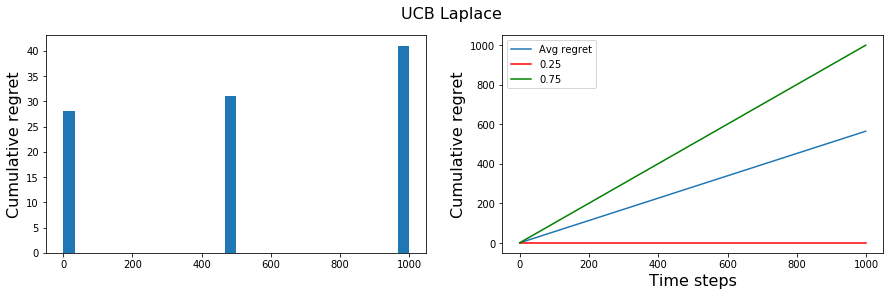

100%|██████████| 100/100 [00:12<00:00,  8.25it/s]


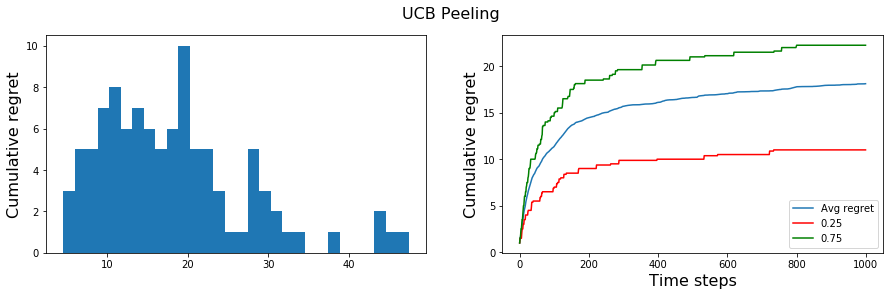

100%|██████████| 100/100 [00:08<00:00, 11.91it/s]


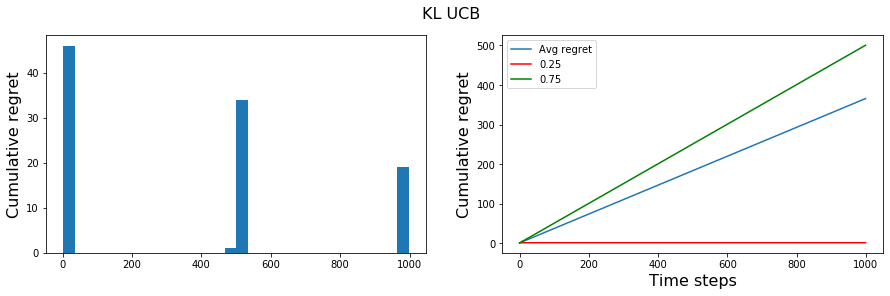

100%|██████████| 100/100 [00:22<00:00,  4.51it/s]


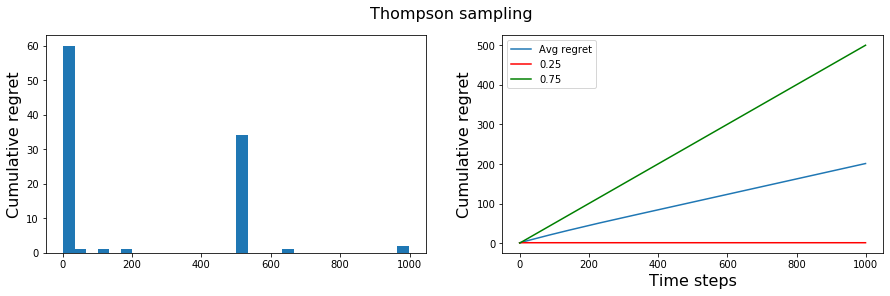

100%|██████████| 100/100 [00:27<00:00,  3.62it/s]


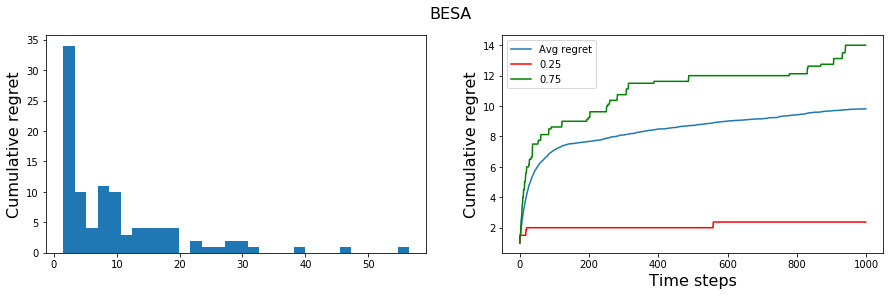

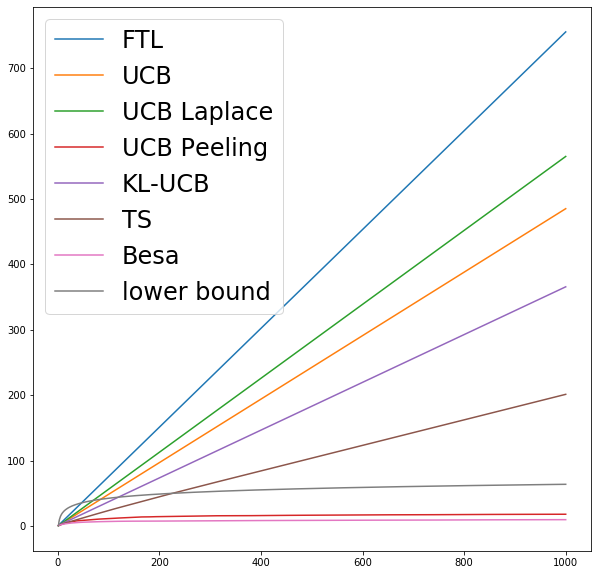

In [23]:
bandit = env.StochasticBandit(nbArms)
bandit.createExponentialArmsFromMeans([0.5, 1.0, 1.5])
runTest(bandit, alg.EXPONENTIAL)

# Poisson

100%|██████████| 100/100 [00:05<00:00, 17.51it/s]


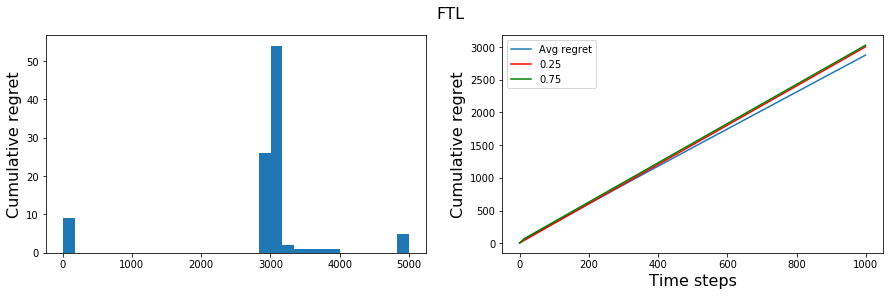

100%|██████████| 100/100 [00:12<00:00,  8.23it/s]


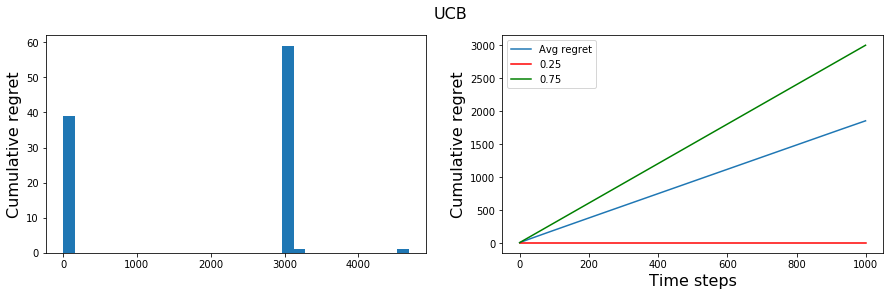

100%|██████████| 100/100 [00:10<00:00,  9.24it/s]


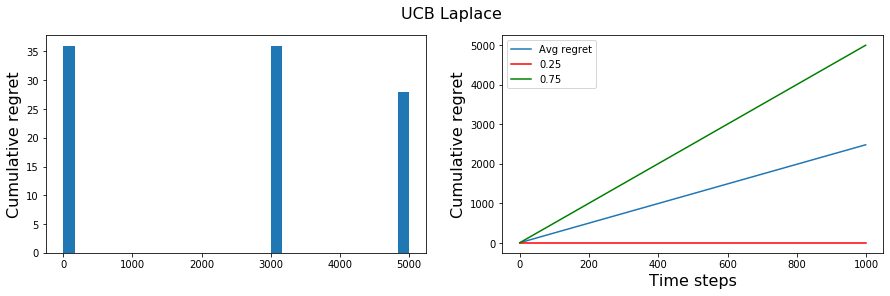

100%|██████████| 100/100 [00:13<00:00,  7.47it/s]


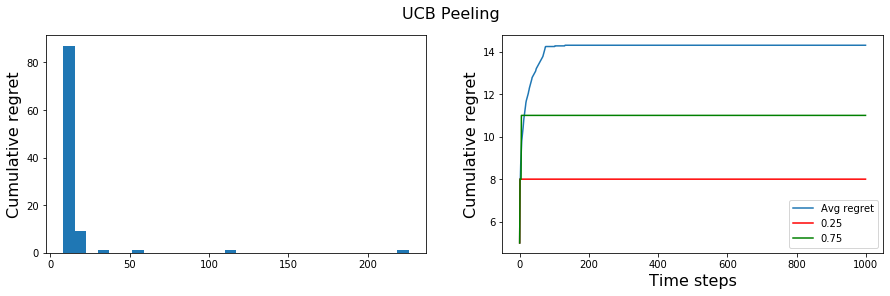

100%|██████████| 100/100 [00:09<00:00, 10.38it/s]


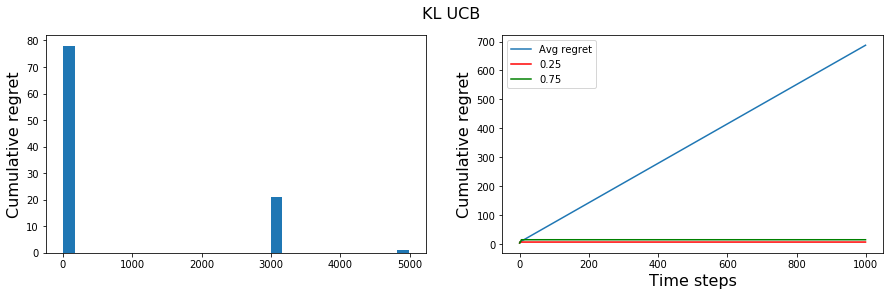

100%|██████████| 100/100 [00:24<00:00,  4.09it/s]


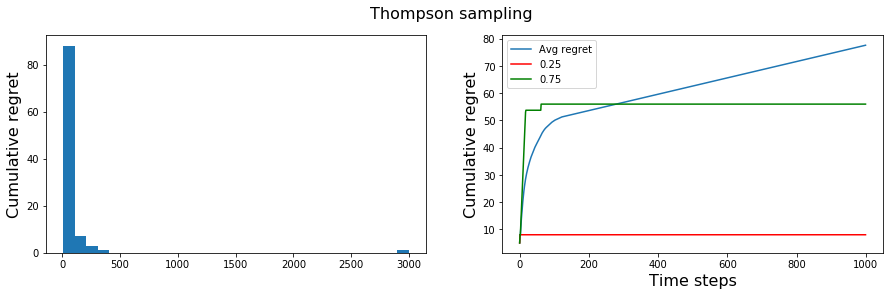

100%|██████████| 100/100 [00:28<00:00,  3.56it/s]


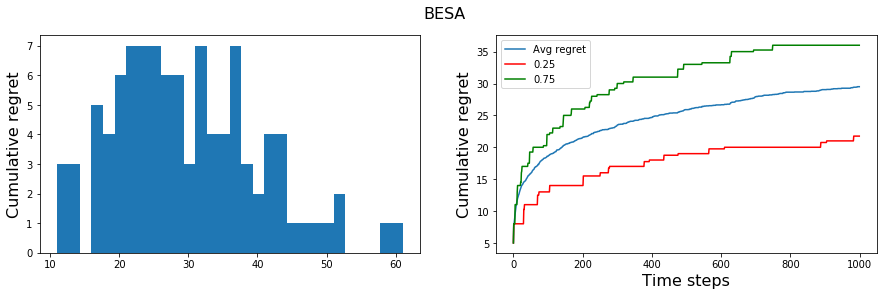

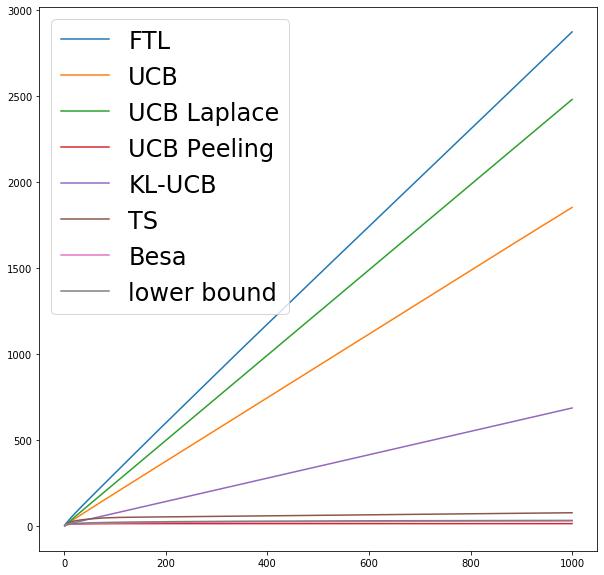

In [24]:
bandit = env.StochasticBandit(nbArms)
bandit.createPoissonArmsFromMeans([1, 3, 6])
runTest(bandit, alg.POISSON)

# Gaussian

100%|██████████| 100/100 [00:04<00:00, 22.57it/s]


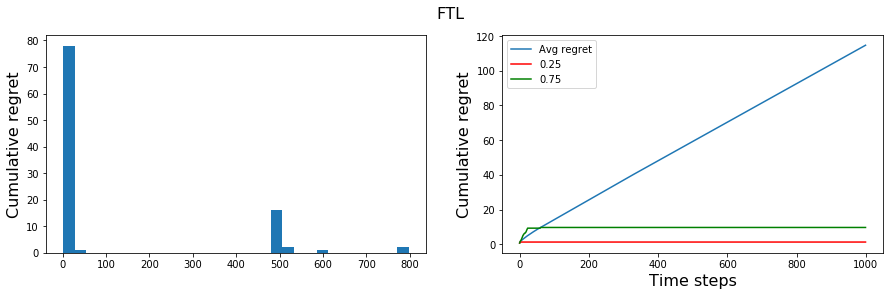

100%|██████████| 100/100 [00:10<00:00,  9.43it/s]


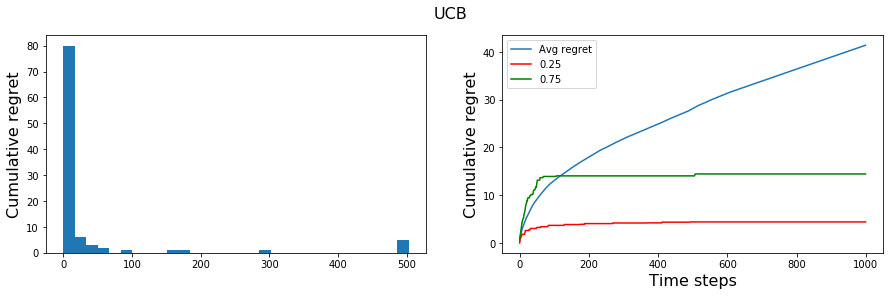

100%|██████████| 100/100 [00:10<00:00,  9.32it/s]


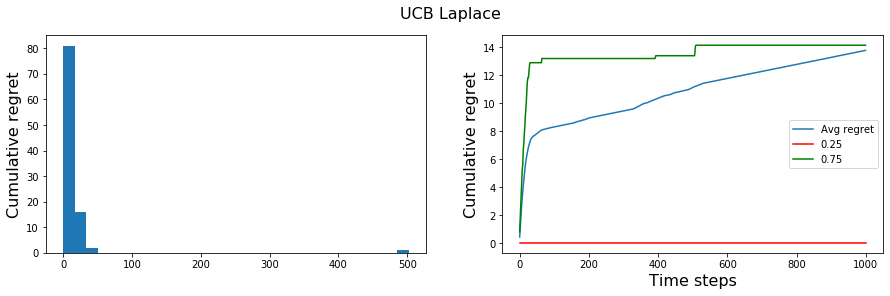

100%|██████████| 100/100 [00:11<00:00,  8.94it/s]


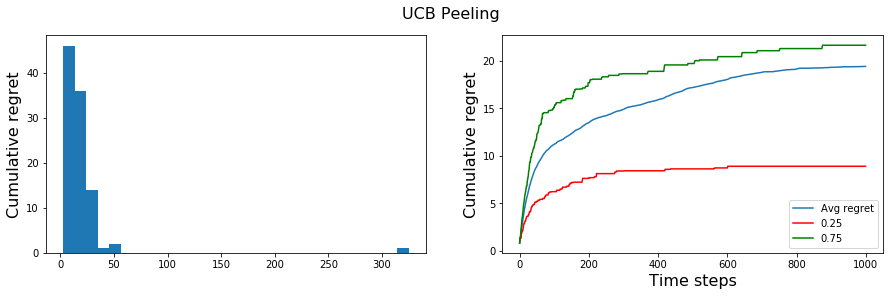

100%|██████████| 100/100 [00:08<00:00, 12.44it/s]


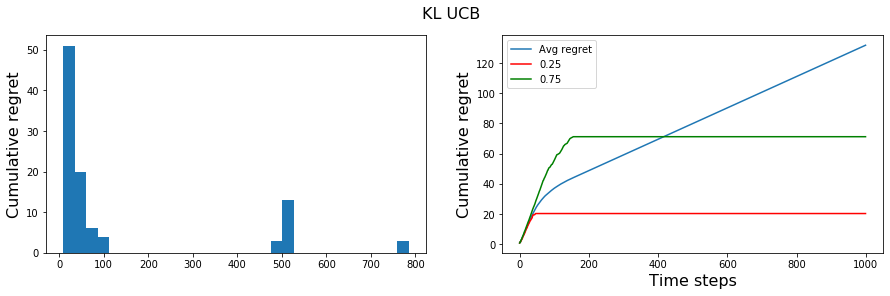

100%|██████████| 100/100 [00:21<00:00,  4.58it/s]


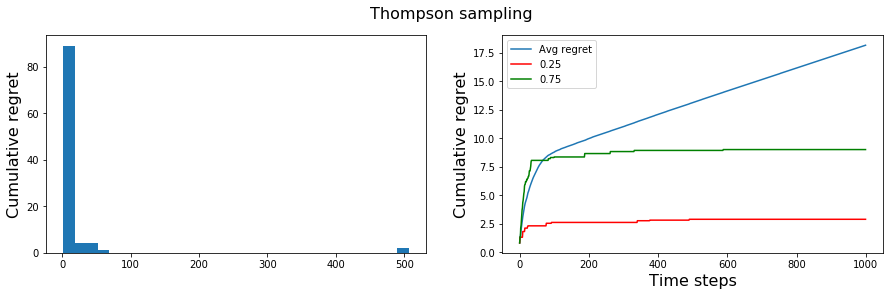

100%|██████████| 100/100 [00:28<00:00,  3.49it/s]


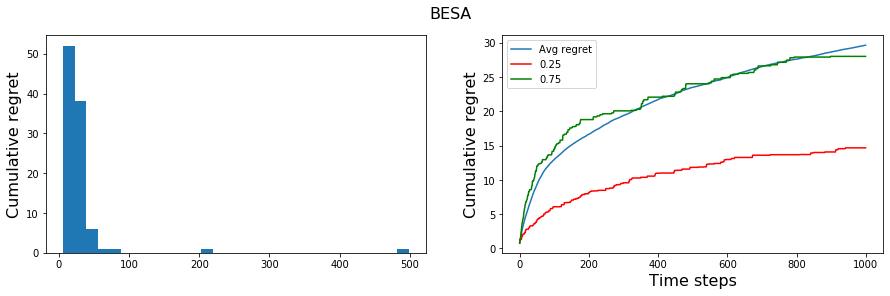

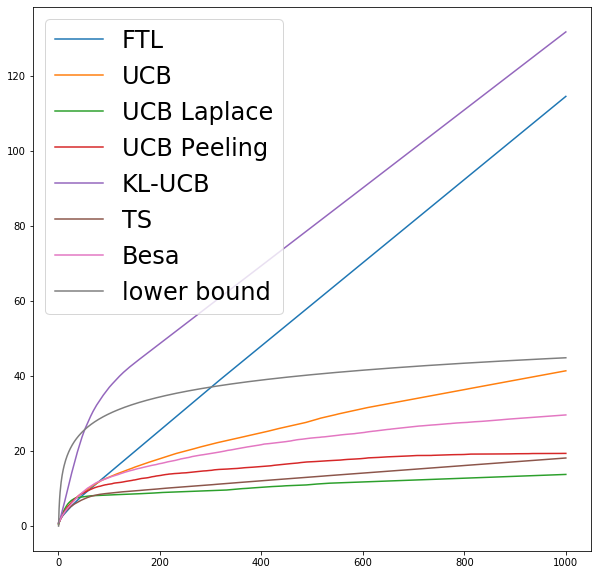

In [25]:
bandit = env.StochasticBandit(nbArms)
bandit.createGaussianArmsFromMeansAndVariance([0.2, 0.5, 1.0], 1.0)
runTest(bandit, alg.GAUSSIAN)